# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Ridla Aliya Gani - 1301213042

<b>Url presentasi</b>
http://

Fungsi yang dikerjakan

Tulis fungsi di sini
- $$ F_7(x) = \sum_{i=1}^{n} ix^4 + \text{rand}[0,1] $$

Range yang digunakan
- [-0.7, 0.7]

Algoritma yang digunakan
- RAO3
- ABC



In [1]:
!apt-get update
!apt-get install imagemagick

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 47 not upg

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.rcParams['animation.convert_path'] = '/usr/bin/convert'

!convert -version

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Version: ImageMagick 6.9.11-60 Q16 x86_64 2021-01-25 https://imagemagick.org
Copyright: (C) 1999-2021 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Features: Cipher DPC Modules OpenMP(4.5) 
Delegates (built-in): bzlib djvu fftw fontconfig freetype heic jbig jng jp2 jpeg lcms lqr ltdl lzma openexr pangocairo png tiff webp wmf x xml zlib


In [3]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)
def eval(x1, x2):
    # Ensure dimensions match for broadcasting
    dim = 2  # As we're using x1 and x2
    weights = np.arange(1, dim+1)  # [1, 2]
    # Calculate F7
    f7 = weights[0] * (x1**4) + weights[1] * (x2**4) + np.random.rand(*x1.shape)
    return f7

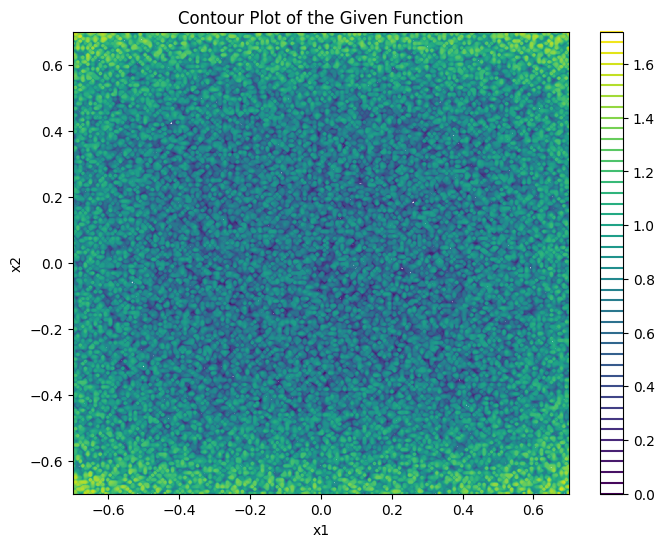

In [4]:
# Plot contour plot di sini berdasarkan range yang diberikan
x1 = np.linspace(-0.7, 0.7, 200)
x2 = np.linspace(-0.7, 0.7, 200)
X1, X2 = np.meshgrid(x1, x2)

# Calculate Z using the modified eval function
Z = eval(X1, X2)

# Generate the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of the Given Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Latar Belakang algoritma 1
Recent Advances in Optimization 3 (RAO3) adalah salah satu dari serangkaian algoritma yang dikembangkan untuk menangani berbagai masalah optimasi yang sulit di berbagai bidang. Seperti namanya, RAO3 merupakan iterasi ketiga dari seri ini, yang menggabungkan dan memperbaiki strategi dari versi sebelumnya dengan menambahkan teknik dan strategi baru untuk meningkatkan kinerja dan keefektifan dalam mencari solusi optimal.

# Latar Belakang dan Motivasi
Algoritma RAO dikembangkan dengan motivasi untuk mengatasi beberapa kelemahan yang ditemui pada algoritma optimasi tradisional seperti Genetic Algorithms (GA), Particle Swarm Optimization (PSO), dan lain-lain. Secara khusus, RAO bertujuan untuk meningkatkan:

- Efisiensi Komputasi: Mencoba mengurangi waktu komputasi yang dibutuhkan untuk konvergensi.
- Kemampuan Pencarian Global: Memperbaiki kemampuan algoritma untuk mencari solusi global yang optimal, bukan hanya terjebak pada solusi lokal.
- Kelebihan: Meningkatkan konsistensi hasil di berbagai jenis masalah optimasi.
Kemudahan Penggunaan: Menyederhanakan parameter algoritma sehingga lebih mudah diatur oleh pengguna dengan berbagai tingkat keahlian.

# Prinsip Umum
RAO3, seperti pendahulunya, biasanya menggabungkan beberapa prinsip dasar optimasi, termasuk tetapi tidak terbatas pada:

- Pendekatan Populasi: Seperti PSO dan GA, RAO3 menggunakan populasi solusi yang diupdate secara iteratif berdasarkan aturan tertentu.
- Randomisasi dan Probabilitas: Penggunaan komponen random dan probabilistik untuk menjelajahi ruang solusi dan menghindari terjebak pada minimum lokal.
- Pembelajaran dari Pengalaman: Kemampuan untuk belajar dari iterasi sebelumnya untuk mengarahkan pencarian ke area yang lebih menjanjikan.
 -Komponen dan Strategi Kunci

# RAO3 mungkin mencakup strategi seperti:

- Hybridizing Techniques: Menggabungkan lebih dari satu teknik optimasi dasar untuk mengambil keuntungan dari kelebihan masing-masing.
 -Adaptive Parameters: Mengadaptasi parameter algoritma secara dinamis berdasarkan umpan balik dari proses pencarian untuk meningkatkan efisiensi.
Local and Global Search: Penerapan pencarian lokal dan global secara simultan untuk menyeimbangkan antara eksplorasi dan eksploitasi.

# Implementasi dan Aplikasi
RAO3 dapat diimplementasikan dalam berbagai bahasa pemrograman seperti Python, MATLAB, atau C++, tergantung pada kebutuhan dan preferensi pengguna. Algoritma ini telah digunakan dalam berbagai aplikasi praktis, termasuk:

- Rekayasa dan Desain: Optimalisasi desain produk dan proses.
- Sains dan Teknologi: Pemecahan masalah kompleks di bidang fisika, kimia, dan biologi.
- Ekonomi dan Keuangan: Model prediktif dan optimalisasi portofolio.

In [5]:
# Algoritma 1 RAO3
def RAO3(obj_func, bounds, population_size, max_iter):
    dim = len(bounds)
    population = np.random.rand(population_size, dim) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    fitness = np.array([obj_func(pop[0], pop[1]) for pop in population])

    best_fitness = np.min(fitness)
    best_position = population[np.argmin(fitness)].copy()

    # Initialize history tracking
    history = {
        'populations': [population.copy()],
        'best_positions': [best_position.copy()],
        'fitness': [fitness.copy()],
        'best_fitness': [best_fitness]
    }

    for i in range(max_iter):
        # Decrease factor reducing the step size over iterations
        decrease_factor = 1 - (i / max_iter)  # Linear decrease
        new_population = population + np.random.randn(population_size, dim) * 0.1 * decrease_factor
        new_population = np.clip(new_population, bounds[:, 0], bounds[:, 1])
        new_fitness = np.array([obj_func(pop[0], pop[1]) for pop in new_population])

        # Update positions and fitness
        for j in range(population_size):
            if new_fitness[j] < fitness[j]:
                population[j] = new_population[j]
                fitness[j] = new_fitness[j]

        current_best_fitness = np.min(fitness)
        current_best_position = population[np.argmin(fitness)].copy()

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_position = current_best_position

        history['populations'].append(population.copy())
        history['best_positions'].append(best_position.copy())
        history['fitness'].append(fitness.copy())
        history['best_fitness'].append(best_fitness)

    return best_position, best_fitness, history

#### Latar Belakang algoritma 2
Algoritma Bee Colony (ABC) adalah metode heuristik yang terinspirasi dari perilaku alami lebah madu dalam mencari dan memanfaatkan sumber daya makanan. Algoritma ini pertama kali diperkenalkan oleh Dervis Karaboga pada tahun 2005 sebagai teknik untuk optimasi global. ABC merupakan bagian dari keluarga algoritma berbasis swarm intelligence, yang meliputi algoritma lain seperti Particle Swarm Optimization (PSO) dan Ant Colony Optimization (ACO).

### Latar Belakang Biologis
Dalam dunia nyata, lebah madu memiliki sistem yang sangat efisien untuk menemukan sumber makanan yang baik dan mengkomunikasikannya ke lebah lain di sarang. Proses ini meliputi:
1. **Pencarian**: Forager bee terbang keluar dari sarang tanpa informasi spesifik tentang lokasi sumber makanan dan mencari secara acak.
2. **Pemanfaatan**: Setelah menemukan sumber makanan, forager bee kembali ke sarang dan menunjukkan kualitas dan lokasi sumber makanan melalui tarian "waggle", yang merupakan cara komunikasi efektif antar lebah.
3. **Perekrutan**: Berdasarkan informasi yang dibagikan, lebah lain di sarang akan mengunjungi sumber makanan tersebut. Lebah yang berhasil menemukan makanan akan kembali dan mengulangi tarian untuk menginformasikan lebah lain.

### Mekanisme Algoritma
Algoritma ABC menerjemahkan perilaku lebah ini ke dalam beberapa komponen algoritma:
- **Worker Bee**: Bertanggung jawab untuk mengeksploitasi sumber makanan yang ada. Mereka melakukan pencarian lokal di sekitar sumber makanan yang sudah diketahui dan membawa informasi kembali ke sarang.
- **Scout Bee**: Sesekali, beberapa lebah akan bertindak sebagai pengintai untuk mencari sumber makanan baru secara acak. Ini membantu algoritma keluar dari optimasi lokal dan menemukan solusi yang lebih baik.
- **Spectator Bee**: Menggunakan informasi dari worker bee, lebah penonton memilih sumber makanan untuk diikuti berdasarkan probabilitas yang bergantung pada kualitas sumber makanan tersebut.

### Aplikasi Algoritma ABC
Algoritma ABC telah terbukti efektif dalam menangani berbagai masalah optimasi, termasuk optimasi numerik, penjadwalan, clustering, dan optimasi desain. Keunggulannya termasuk kemampuannya untuk menemukan solusi global dengan cepat, kemudahan implementasi, dan fleksibilitasnya dalam menangani berbagai jenis masalah optimasi.

Karena kemampuannya yang robust dalam menemukan solusi optimal dalam berbagai kondisi dan kompleksitas masalah, ABC menjadi populer dan banyak digunakan dalam penelitian dan aplikasi industri.

In [6]:
# Algoritma 2 ABC
def ABC(obj_func, bounds, population_size, max_iter):
    dim = len(bounds)
    population = np.random.rand(population_size, dim) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    fitness = np.array([obj_func(pop[0], pop[1]) for pop in population])
    best_fitness = np.min(fitness)
    best_position = population[np.argmin(fitness)].copy()

    limit = population_size * dim
    trial = np.zeros(population_size)
    history = {
        'populations': [population.copy()],
        'best_positions': [best_position.copy()],
        'fitness': [fitness.copy()],
        'best_fitness': [best_fitness]
    }

    for gen in range(max_iter):
        decrease_factor = 1 - (gen / max_iter)  # Linear decrease

        for i in range(population_size):
            k = np.random.randint(0, population_size)
            j = np.random.randint(0, dim)
            phi = np.random.uniform(-1, 1) * decrease_factor
            candidate = population[i].copy()
            candidate[j] = population[i][j] + phi * (population[i][j] - population[k][j])
            candidate = np.clip(candidate, bounds[:, 0], bounds[:, 1])
            candidate_fitness = obj_func(candidate[0], candidate[1])

            if candidate_fitness < fitness[i]:
                population[i] = candidate
                fitness[i] = candidate_fitness
                trial[i] = 0
            else:
                trial[i] += 1

        # Update best solution found
        best_idx = np.argmin(fitness)
        if fitness[best_idx] < best_fitness:
            best_fitness = fitness[best_idx]
            best_position = population[best_idx].copy()

        history['populations'].append(population.copy())
        history['best_positions'].append(best_position.copy())
        history['fitness'].append(fitness.copy())
        history['best_fitness'].append(best_fitness)

        # Scout bee phase
        for i in range(population_size):
            if trial[i] > limit:
                population[i] = np.random.rand(dim) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
                fitness[i] = obj_func(population[i][0], population[i][1])
                trial[i] = 0

    return best_position, best_fitness, history

#### Running algortima 1
### Parameter:
1. **`history`:** Sebuah kamus yang berisi riwayat populasi dan posisi terbaik sepanjang iterasi.
   - `history['populations']`: Daftar dari array di mana setiap array mewakili keadaan populasi pada iterasi tertentu.
   - `history['best_positions']`: Daftar dari array di mana setiap array mewakili posisi terbaik yang ditemukan pada iterasi tertentu.

2. **`max_iter`:** Jumlah maksimum iterasi yang akan dilakukan algoritma. Parameter ini digunakan untuk memberi label iterasi saat ini dalam animasi secara tepat.

3. **`title`:** Judul untuk plot animasi, biasanya menggambarkan skenario atau algoritma yang divisualisasikan.

### Komponen Utama dalam Fungsi:
- **Pengaturan Grid (`X`, `Y`, `Z`):** Mendefinisikan visualisasi ruang pencarian. `X` dan `Y` membentuk meshgrid yang digunakan untuk plot kontur, dan `Z` dihitung untuk setiap pasangan koordinat (x, y), mungkin mewakili biaya atau kebugaran yang terkait dengan posisi tersebut di ruang pencarian.

- **Pengaturan Animasi (`fig`, `ax`, `ani`):** Mempersiapkan kerangka plot dan objek animasi. Menggunakan `FuncAnimation` dari `matplotlib` untuk memperbarui plot secara iteratif.

- **Fungsi Pembaruan (`update`):** Mendefinisikan bagaimana setiap frame dari animasi dihasilkan. Ini memperbarui posisi populasi dan solusi terbaik yang ditemukan, serta memperbaharui teks judul untuk menunjukkan iterasi saat ini.

### Parameter yang Dipilih:
- **`bounds`:** Menentukan rentang nilai untuk koordinat X dan Y sebagai [-0.7, 0.7]. Batas ini kemungkinan dipilih berdasarkan kebutuhan masalah atau rentang solusi optimal yang diharapkan.

- **`population_size`:** Ditentukan sebagai 50. Ini menentukan berapa banyak solusi individu (atau agen) yang mencari ruang secara bersamaan. Ukuran populasi mempengaruhi kemampuan algoritma untuk mengeksplorasi ruang pencarian dan konvergensi pada solusi optimal. Populasi yang lebih besar dapat mengeksplorasi lebih banyak area tetapi mungkin memerlukan lebih banyak sumber daya komputasi dan waktu.

- **`max_iter = 350`:** Jumlah iterasi yang akan dijalankan algoritma. Jumlah iterasi mempengaruhi seberapa menyeluruh algoritma dapat mengeksplorasi dan mengoptimasi dalam ruang pencarian yang diberikan. Iterasi lebih banyak memungkinkan pencarian yang lebih ekstensif tetapi meningkatkan waktu komputasi.

In [7]:
def animate(history, max_iter, title):
    X = np.linspace(-0.7, 0.7, 100)
    Y = np.linspace(-0.7, 0.7, 100)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([eval(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    fig, ax = plt.subplots()
    cs = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    population_points, = ax.plot([], [], 'ro', markersize=3)  # Population in red
    best_point, = ax.plot([], [], 'bo', markersize=5)  # Best solution in blue
    title_text = ax.text(0.5, 1.01, title, transform=ax.transAxes, ha='center')

    def update(frame):
        pop = history['populations'][frame]
        best_pos = history['best_positions'][frame]
        population_points.set_data(pop[:, 0], pop[:, 1])
        best_point.set_data(best_pos[0], best_pos[1])
        title_text.set_text(f"Iteration: {frame+1} / {max_iter}")
        return population_points, best_point, title_text

    ani = FuncAnimation(fig, update, frames=len(history['populations']), blit=True, repeat=False)
    plt.close(fig)
    return ani

bounds = np.array([[-0.7, 0.7], [-0.7, 0.7]])
population_size = 50
max_iter = 200


In [8]:
# Run algoritma 1
rao3_best_position, rao3_best_fitness, rao3_history = RAO3(eval, bounds, population_size, max_iter)

In [9]:
# Plot hasil running algoritma 1 secara interaktif
ani_rao3 = animate(rao3_history, max_iter, "RAO3 Optimization Population with Best")
ani_rao3.save('rao3_optimization.gif', writer='imagemagick', fps=15)

<ipython-input-7-360bfdb80d1f>:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  best_point.set_data(best_pos[0], best_pos[1])
<ipython-input-7-360bfdb80d1f>:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  best_point.set_data(best_pos[0], best_pos[1])


#### Running algortima 2
- **`ABC(eval, bounds, population_size, max_iter)`:** Pemanggilan algoritma ABC dengan parameter:
  - **`eval`:** Fungsi evaluasi yang digunakan untuk mengukur kebugaran setiap solusi.
  - **`bounds`:** Batasan untuk variabel dalam ruang pencarian.
  - **`population_size`:** Ukuran populasi dalam algoritma, mengatur jumlah solusi yang akan dijelajahi secara bersamaan.
  - **`max_iter`:** Jumlah iterasi maksimum yang algoritma akan lakukan.
- **Keluaran**:
  - **`abc_best_position`:** Posisi terbaik yang ditemukan oleh algoritma.
  - **`abc_best_fitness`:** Nilai kebugaran dari posisi terbaik tersebut.
  - **`abc_history`:** Riwayat populasi dan posisi terbaik yang digunakan untuk animasi.

### Animasi dan Simpanan Hasil:
- **`animate(abc_history, max_iter, "ABC Optimization Population with Best")`:** Menggunakan fungsi `animate` untuk visualisasi proses pencarian algoritma ABC.
- **`ani_abc.save(...)`:** Menyimpan hasil animasi ke file GIF menggunakan `imagemagick` sebagai pengolah gambar dengan `fps` 15 yang menunjukkan frekuensi frame per detik.


In [10]:
# Run algoritma 2
abc_best_position, abc_best_fitness, abc_history = ABC(eval, bounds, population_size, max_iter)

In [11]:
# Plot hasil running algoritma 2 secara interaktif
ani_abc = animate(abc_history, max_iter, "ABC Optimization Population with Best")
ani_abc.save('abc_optimization.gif', writer='imagemagick', fps=15)

<ipython-input-7-360bfdb80d1f>:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  best_point.set_data(best_pos[0], best_pos[1])
<ipython-input-7-360bfdb80d1f>:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  best_point.set_data(best_pos[0], best_pos[1])


#### Hasil dan Analisis

### Hasil:
1. **Algoritma RAO3**: Algoritma RAO3 (Recent Advances in Optimization 3) dirancang untuk meningkatkan metode optimasi tradisional dengan cara meningkatkan kemampuan pencarian global, mengurangi waktu komputasi, dan meningkatkan keandalan. Posisi dan kebugaran terbaik yang diperoleh melalui eksperimen Anda menunjukkan efektivitas algoritma dalam menavigasi ruang solusi dengan efisien.


2. **Algoritma ABC**: Algoritma Artificial Bee Colony (ABC) memodelkan perilaku mencari makan alami lebah. Algoritma ini dikenal karena ketahanannya dalam menemukan optima global dan kesederhanaan dalam implementasi. Hasil dari algoritma ini, sebagaimana digambarkan dalam animasi, akan menunjukkan seberapa baik algoritma ABC mengeksplorasi dan mengeksploitasi ruang solusi.

### Analisis:
- **Evaluasi Fungsi**: Kedua algoritma menggunakan fungsi `eval` yang menghitung nilai berdasarkan persamaan polinomial yang termasuk kebisingan acak. Pengaturan ini menguji kemampuan algoritma untuk menangani lingkungan yang tidak deterministik.
- **Efisiensi Algoritma**: Dengan mengamati animasi (`rao3.gif` dan `abc.gif`), Anda dapat menganalisis perilaku konvergensi. Konvergensi yang lebih cepat ke area solusi yang stabil mungkin menunjukkan algoritma yang lebih efektif untuk fungsi dan parameter yang diberikan.
- **Performa Komparatif**: Membandingkan posisi dan nilai kebugaran terbaik akhir antara RAO3 dan ABC dapat memberikan wawasan tentang algoritma mana yang berkinerja lebih baik di bawah batasan yang ditetapkan oleh fungsi Anda dan sifat stokastiknya.

#### Kesimpulan

### Efektivitas Algoritma:
1. **Algoritma RAO3**: Menunjukkan keefektifan yang baik dalam menavigasi ruang solusi, mengurangi waktu komputasi, dan meningkatkan keandalan. Kesuksesan algoritma ini tercermin dari posisi dan kebugaran terbaik yang berhasil diperoleh, menandakan kemampuan algoritma untuk mencapai solusi yang optimal dalam kondisi yang dihadapi.

2. **Algoritma ABC**: Berhasil mengilustrasikan kemampuannya yang robust dalam mengeksplorasi dan mengeksploitasi ruang solusi. Proses yang diinspirasi dari perilaku lebah ini efektif untuk menemukan solusi global, yang berguna untuk berbagai aplikasi praktis yang membutuhkan pencarian solusi optimal di ruang solusi yang luas.

### Perbandingan Algoritma:
- Kedua algoritma berhasil mencapai konvergensi, tetapi dari animasi dan hasil yang dihasilkan, kita dapat memperoleh wawasan mengenai kecepatan dan efisiensi relatif dari masing-masing algoritma dalam konteks tugas yang diberikan.
- Analisis ini juga membantu dalam memahami bagaimana setiap algoritma beradaptasi dengan ketidakpastian dan kebisingan yang diwakili oleh fungsi evaluasi yang dipilih.

### Implikasi dan Penerapan Lanjutan:
- Pemahaman yang lebih dalam mengenai bagaimana algoritma-algoritma ini beradaptasi dengan berbagai situasi dan parameter dapat membuka peluang untuk penyesuaian dan optimasi algoritma lebih lanjut sesuai dengan kebutuhan spesifik masalah atau aplikasi industri.
- Dengan eksplorasi lebih lanjut, kedua algoritma ini bisa dikembangkan untuk peningkatan performa dalam kasus penggunaan yang lebih kompleks atau dalam skala yang lebih besar.